***Binary Classification of Iris Dataset***


**Assignment by 21K-3114**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron


In [8]:
iris = load_iris()
X = iris.data
y = iris.target
print("Shape of feature data (X):", X.shape)
print("Shape of target labels (y):", y.shape)
print("First few rows of feature data:")
print(X[:5])
print("Corresponding target labels:")
print(y)


Shape of feature data (X): (150, 4)
Shape of target labels (y): (150,)
First few rows of feature data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Corresponding target labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
import numpy as np
X_filtered = X[(y == 0) | (y == 1)]
y_filtered = y[(y == 0) | (y == 1)]
print("Shape of filtered feature data (X_filtered):", X_filtered.shape)
print("Shape of filtered target labels (y_filtered):", y_filtered.shape)


Shape of filtered feature data (X_filtered): (100, 4)
Shape of filtered target labels (y_filtered): (100,)


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (80, 4)
Shape of X_test: (20, 4)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [14]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0
        for _ in range(self.n_epochs):
            # Forward pass
            y_pred = self.predict(X_train)
            #gradient of the cost function
            error = y_train - y_pred
            gradient_weights = -2 * np.dot(X_train.T, error)
            gradient_bias = -2 * np.sum(error)

            # We have Updated weights and bias using gradient descent
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.train(X_train, y_train)
y_pred = perceptron.predict(X_test)


In [16]:
perceptron.train(X_train, y_train)
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)


Weights: [-1.06738542e+189 -5.86100895e+188 -5.92945685e+188 -1.68708457e+188]
Bias: -1.9175019965284228e+188


Epoch 10/100


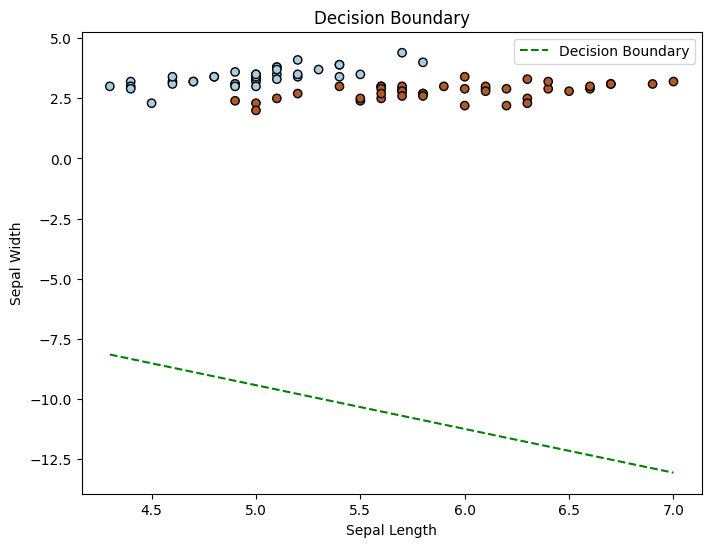


Epoch 20/100


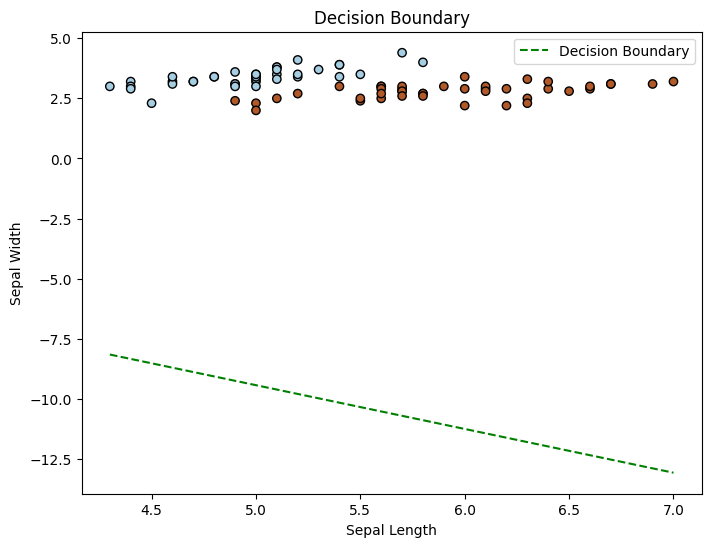


Epoch 30/100


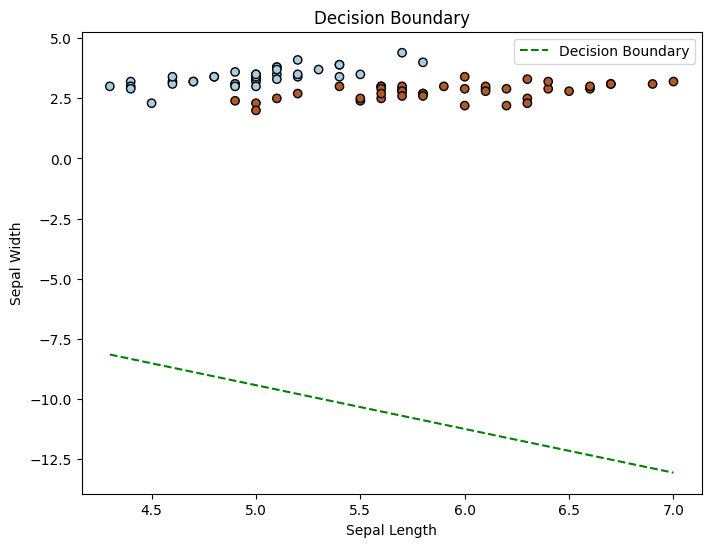


Epoch 40/100


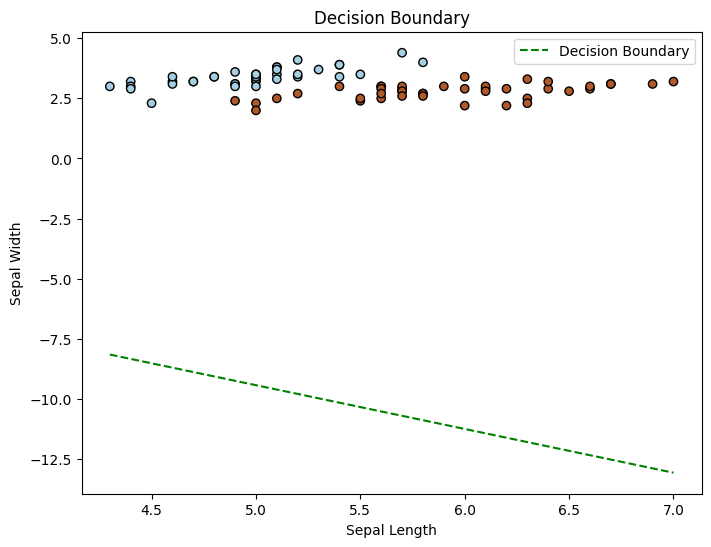


Epoch 50/100


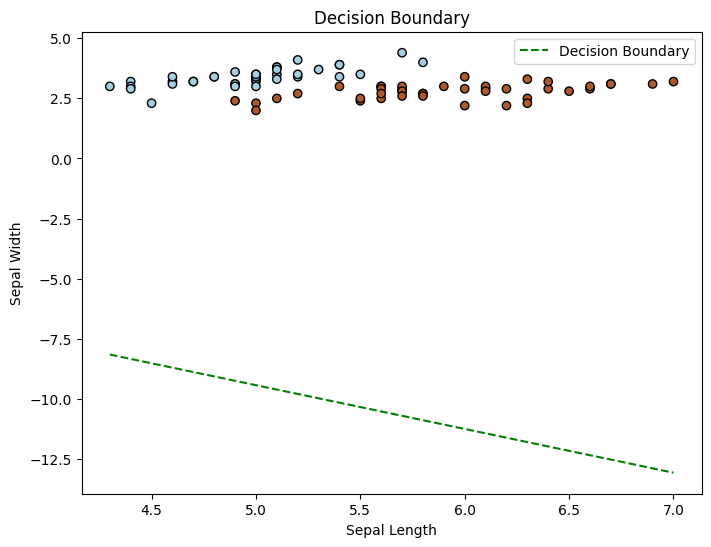


Epoch 60/100


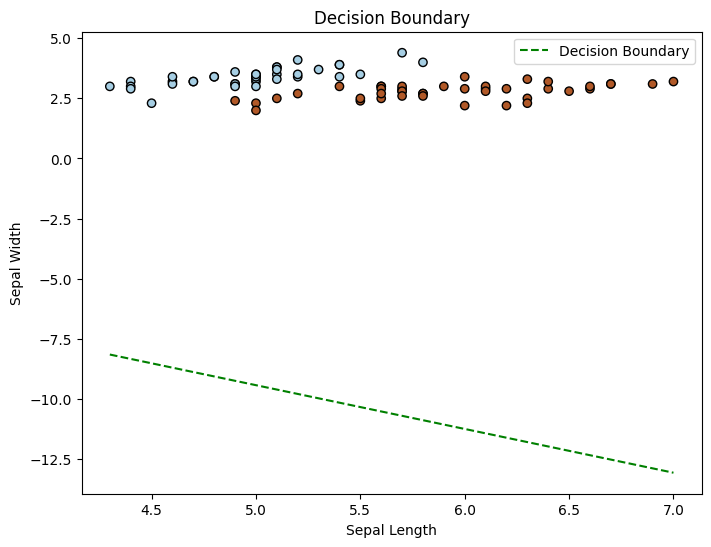


Epoch 70/100


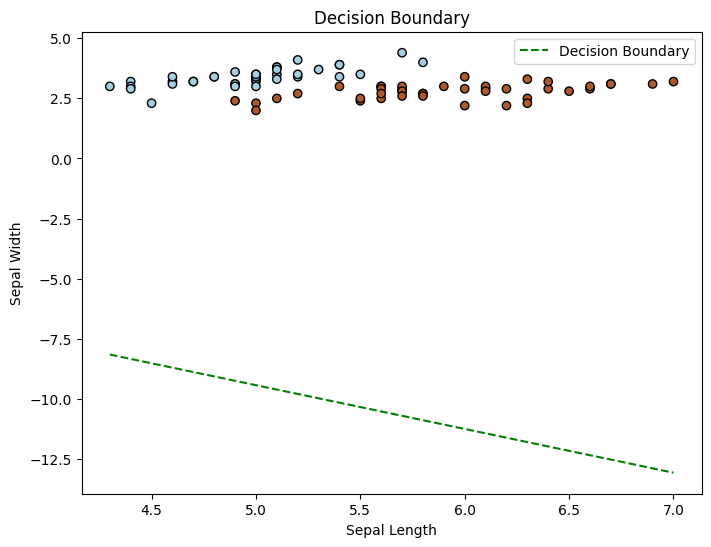


Epoch 80/100


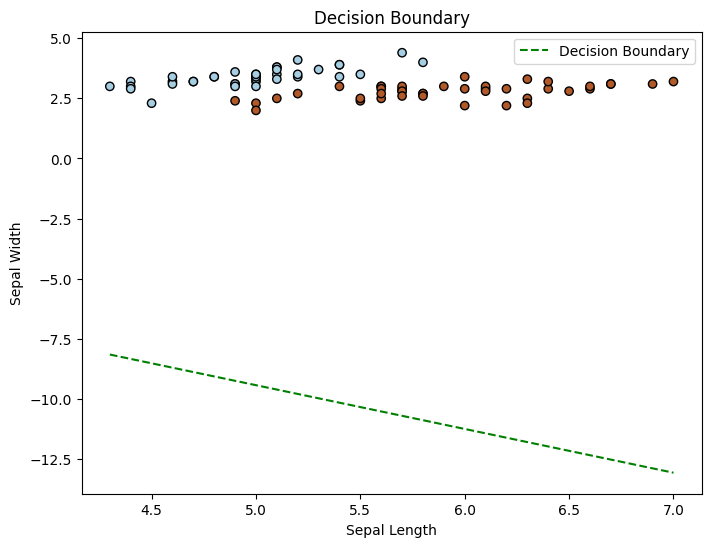


Epoch 90/100


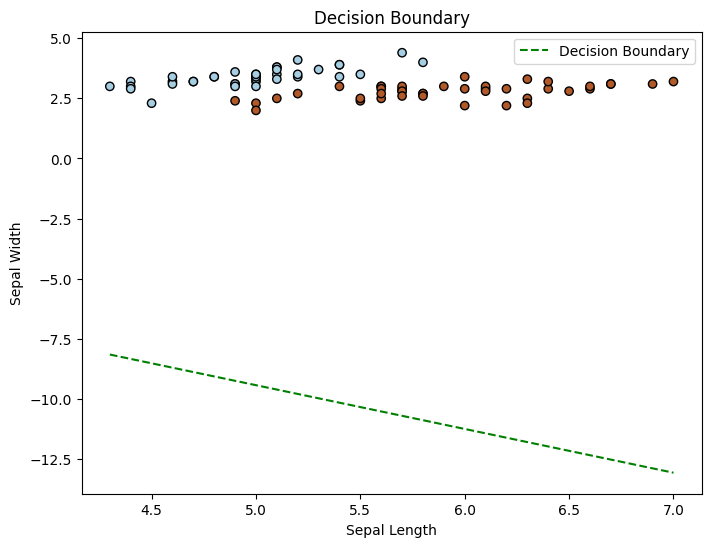


Epoch 100/100


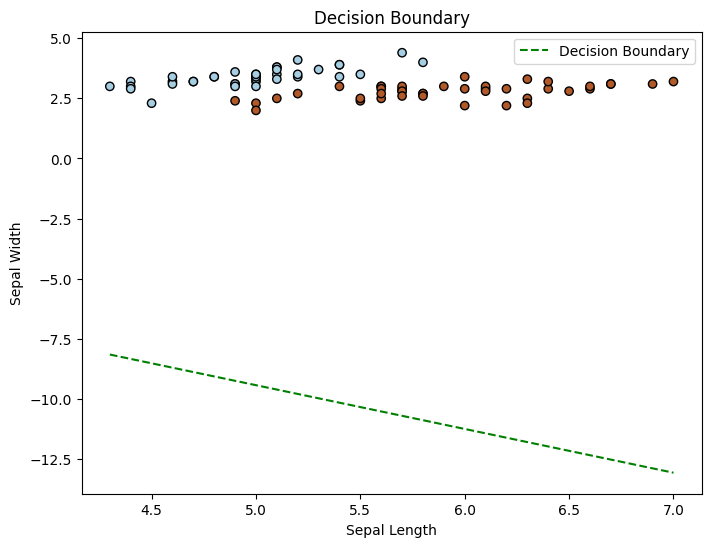

In [24]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100, plot_interval=10):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.plot_interval = plot_interval
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        for epoch in range(1, self.n_epochs + 1):
            y_pred = self.predict(X_train)

            error = y_train - y_pred
            gradient_weights = -2 * np.dot(X_train.T, error)
            gradient_bias = -2 * np.sum(error)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            if epoch % self.plot_interval == 0 or epoch == self.n_epochs:
                print(f"Epoch {epoch}/{self.n_epochs}")
                self.plot_decision_boundary(X_train, y_train)
                print()

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        decision_boundary = slope * x_vals + intercept
        plt.plot(x_vals, decision_boundary, 'g--', label='Decision Boundary')

        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.title('Decision Boundary')
        plt.legend()
        plt.show()

perceptron = Perceptron(learning_rate=0.01, n_epochs=100, plot_interval=10)
perceptron.train(X_train, y_train)


Trying with different **Hyperparameters**


<ipython-input-27-3911623411c3>:21: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradient_weights
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-27-3911623411c3>:21: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradient_weights
<ipython-input-27-3911623411c3>:22: RuntimeWarning: invalid value encountered in double_scalars
  self.bias -= self.learning_rate * gradient_bias


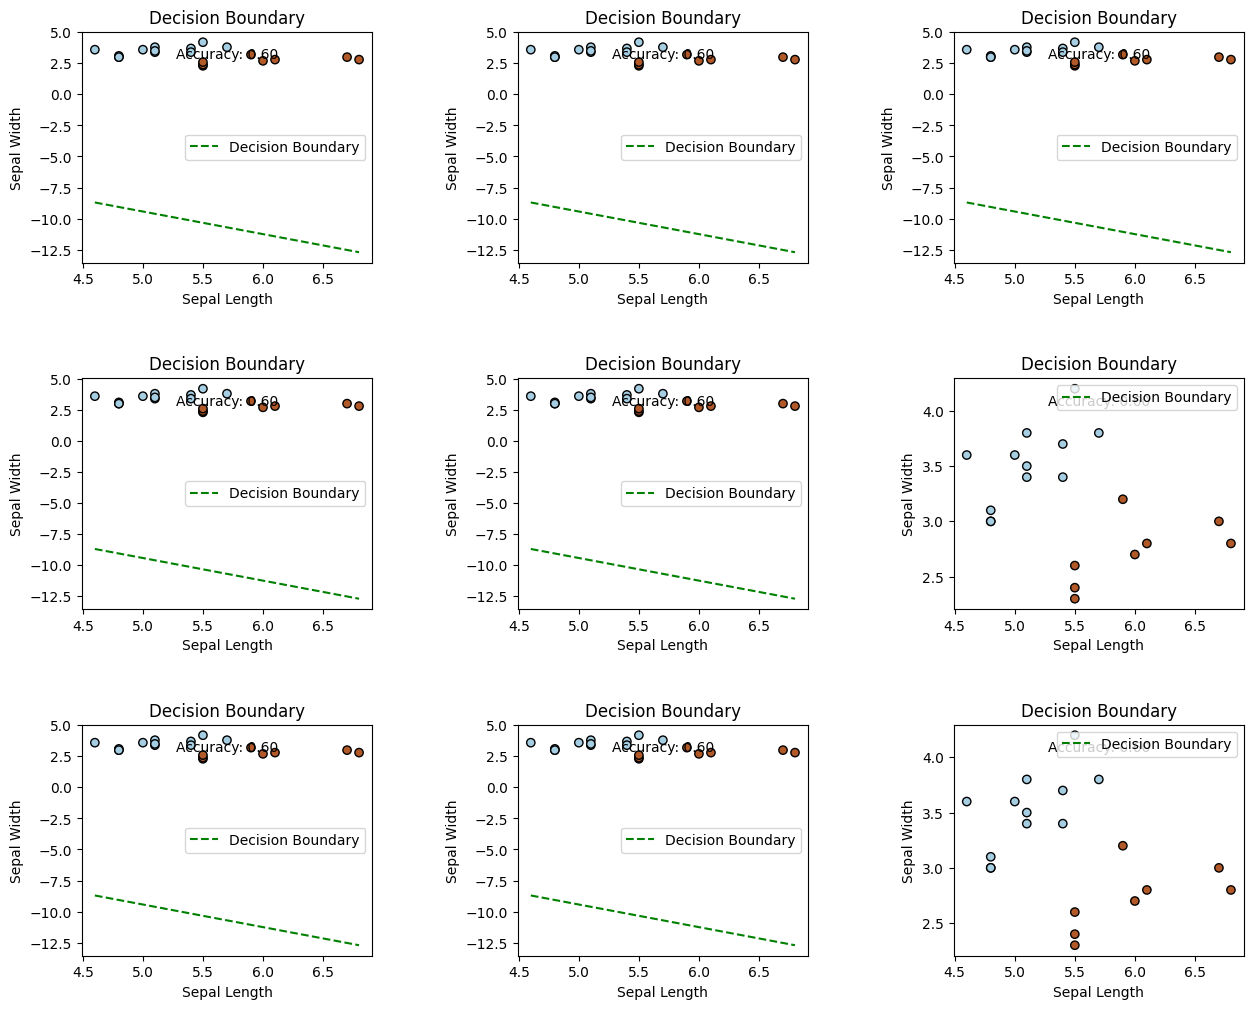

In [27]:
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        for _ in range(self.n_epochs):
            y_pred = self.predict(X_train)

            error = y_train - y_pred
            gradient_weights = -2 * np.dot(X_train.T, error)
            gradient_bias = -2 * np.sum(error)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_decision_boundary(self, X, y, ax=None):
        if ax is None:
            ax = plt.gca()

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        decision_boundary = slope * x_vals + intercept
        ax.plot(x_vals, decision_boundary, 'g--', label='Decision Boundary')

        ax.set_xlabel('Sepal Length')
        ax.set_ylabel('Sepal Width')
        ax.set_title('Decision Boundary')
        ax.legend()

def experiment(learning_rates, n_epochs_values, X_train, y_train, X_test, y_test):
    fig, axs = plt.subplots(len(learning_rates), len(n_epochs_values), figsize=(15, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, lr in enumerate(learning_rates):
        for j, n_epochs in enumerate(n_epochs_values):
            perceptron = Perceptron(learning_rate=lr, n_epochs=n_epochs)
            perceptron.train(X_train, y_train)
            y_pred = np.where(perceptron.predict(X_test) >= 0, 1, 0)

            perceptron.plot_decision_boundary(X_test, y_test, ax=axs[i, j])

            accuracy = accuracy_score(y_test, y_pred)
            axs[i, j].text(0.5, 0.9, f'Accuracy: {accuracy:.2f}', horizontalalignment='center',
                           verticalalignment='center', transform=axs[i, j].transAxes)

    plt.show()
learning_rates = [0.001, 0.01, 0.1]
n_epochs_values = [50, 100, 200]
experiment(learning_rates, n_epochs_values, X_train, y_train, X_test, y_test)


**Final Decision Boundary plotting using different marker colour Using same code in above cell**

<ipython-input-28-6b4658805580>:23: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradient_weights
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-28-6b4658805580>:23: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradient_weights
<ipython-input-28-6b4658805580>:24: RuntimeWarning: invalid value encountered in double_scalars
  self.bias -= self.learning_rate * gradient_bias


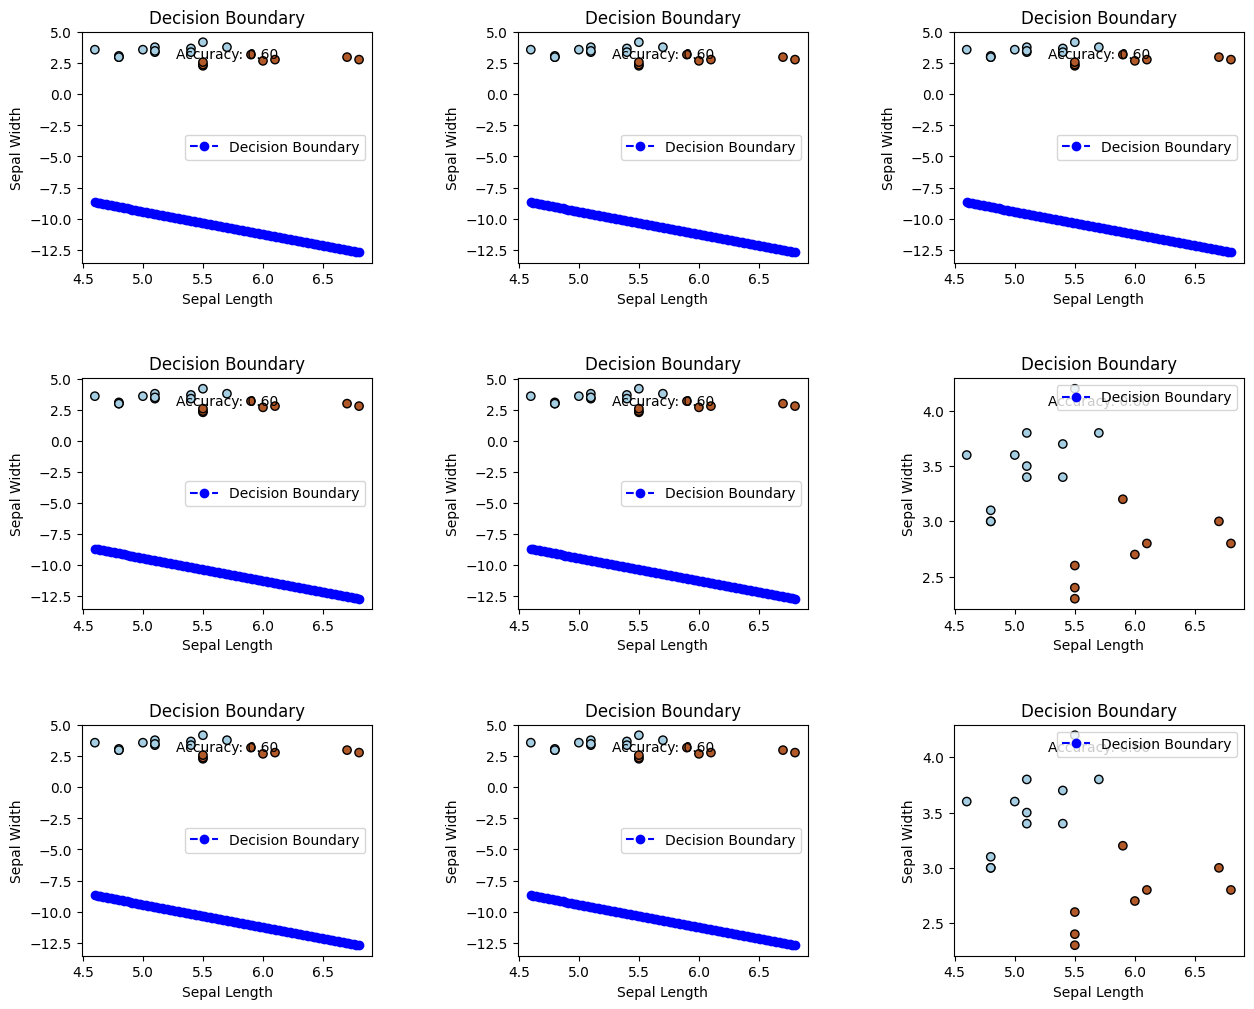

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        for _ in range(self.n_epochs):
            y_pred = self.predict(X_train)

            error = y_train - y_pred
            gradient_weights = -2 * np.dot(X_train.T, error)
            gradient_bias = -2 * np.sum(error)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_decision_boundary(self, X, y, marker='o', color='b', ax=None):
        if ax is None:
            ax = plt.gca()

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        decision_boundary = slope * x_vals + intercept
        ax.plot(x_vals, decision_boundary, linestyle='--', marker=marker, color=color, label='Decision Boundary')

        ax.set_xlabel('Sepal Length')
        ax.set_ylabel('Sepal Width')
        ax.set_title('Decision Boundary')
        ax.legend()

def experiment(learning_rates, n_epochs_values, X_train, y_train, X_test, y_test):
    fig, axs = plt.subplots(len(learning_rates), len(n_epochs_values), figsize=(15, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, lr in enumerate(learning_rates):
        for j, n_epochs in enumerate(n_epochs_values):
            perceptron = Perceptron(learning_rate=lr, n_epochs=n_epochs)
            perceptron.train(X_train, y_train)

            y_pred = np.where(perceptron.predict(X_test) >= 0, 1, 0)

            perceptron.plot_decision_boundary(X_test, y_test, marker='o', color='b', ax=axs[i, j])
            accuracy = accuracy_score(y_test, y_pred)
            axs[i, j].text(0.5, 0.9, f'Accuracy: {accuracy:.2f}', horizontalalignment='center',
                           verticalalignment='center', transform=axs[i, j].transAxes)

    plt.show()

learning_rates = [0.001, 0.01, 0.1]
n_epochs_values = [50, 100, 200]

experiment(learning_rates, n_epochs_values, X_train, y_train, X_test, y_test)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        for _ in range(self.n_epochs):
            y_pred = self.predict(X_train)

            error = y_train - y_pred
            gradient_weights = -2 * np.dot(X_train.T, error)
            gradient_bias = -2 * np.sum(error)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        decision_boundary = slope * x_vals + intercept
        plt.plot(x_vals, decision_boundary, 'g--', label='Decision Boundary')

        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.title('Decision Boundary')
        plt.legend()
        plt.show()

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.train(X_train, y_train)

y_pred = perceptron.predict(X_test)

y_pred_binary = np.where(y_pred >= 0, 1, 0)

report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


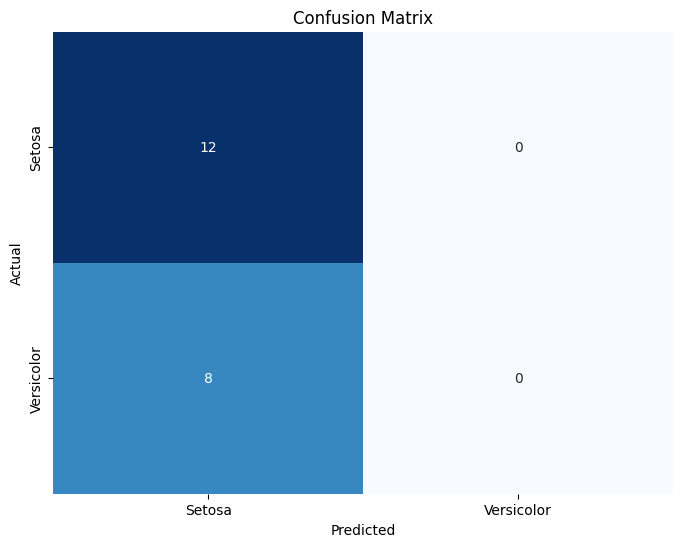

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Setosa', 'Versicolor'], yticklabels=['Setosa', 'Versicolor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Report Insights:**

1. The model has achieved perfect recall (1.00) for class 0 (setosa)
2. However, Model has Low precision and Recall for class 1 (versicolor)
3. Overall accuracy of model is (0.60) indicating that 60 percent of the samples were classified correctly

**Hyperparameter insights:**

1. The hyperparameters such as learning rate and number of epochs were set to 0.01 and 100, respectively, for this evaluation. These values can be adjusted to optimize the model's performance.

2. To improve the model's performance, hyperparameter tuning techniques such as grid search or random search can be employed to find the optimal combination of hyperparameters.

3. Other hyperparameters such as regularization strength, batch size (if using mini-batch gradient descent), and initialization method can also be explored to further optimize the model.